<a href="https://colab.research.google.com/github/iuri/opencv/blob/main/Pratica_visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução - Sistemas de Visão

Neste mini curso prático de visão computacional para iniciantes, você será apresentado a abordagens utilizadas para resolver a tarefa de reconhecimento de padrões em imagens, visualizando os desafios encontrados, aplicações e as subdivisões do reconhecimento em visão computacional.

Durante o curso iremos analisar e processar imagens. Primeiro, veremos as propriedades das imagens e exploraremos os diferentes comandos de processamento de imagens. Depois de aprender o básico, passaremos por alguns exercícios de identificação de objetos em imagens.

#Dependências

Nessa seção são carregadas as dependências necessárias para a execução dos exemplos a seguir.



*   [Numpy](https://www.numpy.org/) é uma biblioteca de manipulação de matrizes e algebra linear.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) é uma biblioteca para o desenvolvimento de aplicações na área de Visão Computacional.
*   [Skimage](https://scikit-image.org/) é uma biblioteca que oferece suporte a importação de imagens a partir de uma URL.



In [ ]:
import cv2 
import numpy as np 
from skimage import io 
from google.colab.patches import cv2_imshow # Necessário para exibição de imagens no Google Colab - substitui a função original cv2.imshow() do openCV

*   [Tesseract](https://github.com/tesseract-ocr/tesseract) é um software de código aberto para OCR (Optical Character Recognition). Foi inicialmente desenvolvido pela HP como uma ferramenta em C ++. Desde 2006 é desenvolvido pelo Google.
*   [Pytesseract](https://pypi.org/project/pytesseract/) Python-tesseract é uma ferramenta de reconhecimento óptico de caracteres (OCR) para python. 

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

# **Lendo Imagens**

Nesta etapa, vamos ler imagens de URLs e exibi-las usando openCV, observe a diferença ao ler imagens em formato RGB e BGR. Os canais de cores de entrada padrão estão no formato BGR para openCV.

### A percepção Humana

O ser humano possui um sistema visual nativo extremamente poderoso. Perceber o ambiente e/ou descrever o conteúdo de imagens é uma tarefa natural. 

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/03/lena.png") # Carrega imagem a partir de uma URL
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Função responsável por converter do formato BGR para RGB
print("Imagem no padrão RGB")
cv2_imshow(img) # Função responsável por exibir a imagem na plataforma Google Colab (equivalente a função cv2.imshow()) 

### A percepção do computador

Enquanto vemos a imagem, o computador apenas percebe números.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/03/lena.png") 
print("Imagem no padrão BGR")
cv2_imshow(img)

In [ ]:
print("(largura, altura, canais)")
print(img.shape)

#### As matrizes de pixels

In [ ]:
print("Imagem completa: \n")
print(img)

In [ ]:
print("Pixel individual (BGR): \n")
print(img[511][511])

#Funções básicas

##Conversão em escala de cinza

Existem vários métodos comumente usados ​​para converter uma imagem RGB em uma imagem em escala de cinza, como o **método médio** e o **método ponderado**.

**O método médio** usa o valor médio de R, G e B como o valor da escala de cinza.

<p align=center><strong>Cinza = (R + G + B ) / 3</strong></p>

Teoricamente, a fórmula está 100% correta. Mas ao escrever o código, é possivel encontrar o erro de estouro de memória (pois a soma de R, G e B é maior que 255). Para evitar o erro, R, G e B devem ser calculados separadamente.

<p align=center><strong>Cinza = R / 3 + G / 3 + B / 3</strong></p>

O método médio é simples, mas não funciona tão bem quanto o esperado, pois os olhos humanos reagem de maneira diferente ao RGB. Os olhos são mais sensíveis à luz verde, menos sensíveis à luz vermelha e menos sensíveis ainda à luz azul. Portanto, as três cores devem ter pesos diferentes na distribuição. Isso nos leva ao método ponderado.

<p align=center><strong>Cinza  = 0.299R + 0.587G + 0.114B</strong></p>

In [ ]:
imgGray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(imgGray)
print("Resolução:")
print(imgGray.shape)
print("Pixel individual:")
print(imgGray[511][511])

## Aplicação de blur

O *blurring* é um exemplo de aplicação de um filtro passa-baixa a uma imagem. Na visão computacional, o termo “filtro passa-baixa” se aplica à remoção de ruído de uma imagem, deixando a maior parte da imagem intacta. O *blurring* é uma operação muito comum utilizada antes de outras tarefas, como na detecção de bordas.

In [ ]:
imgBlur = cv2.GaussianBlur(img,(7,7),10)
cv2_imshow(imgBlur)

## Aplicação do Filtro Canny

O detector de bordas Canny surgiu através dos trabalhos de Marr e Hildreth. Ele é um operador gaussiano de primeira derivada que suaviza os ruídos e localiza as bordas. 

Uma borda é um “lugar geométrico” que delimita um objeto qualquer, ou seja, são os pontos em que a intensidade luminosa muda de forma abrupta.

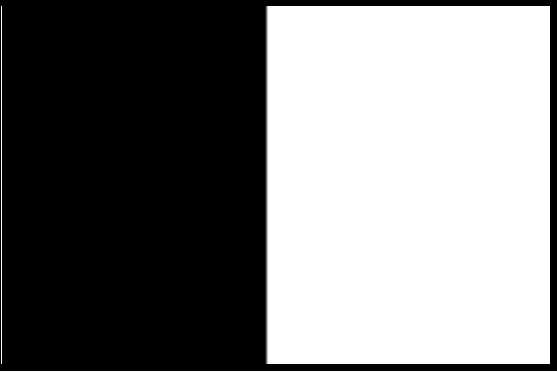

In [ ]:
imgCanny = cv2.Canny(img,150,200)
cv2_imshow(imgCanny)

##Aplicação de dilatação


Na dilatação o valor do pixel de saída é o valor máximo de todos os pixels na vizinhança. Em uma imagem binária, um pixel é definido como 1 se algum dos pixels vizinhos tiver o valor 1.

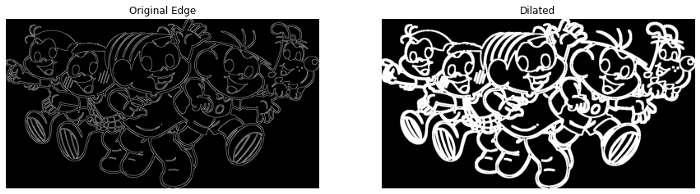

In [ ]:
kernel = np.ones((2,2),np.uint8)
imgDilation = cv2.dilate(imgCanny,kernel,iterations=1)
cv2_imshow(imgDilation)

## Aplicação de erosão


Operações morfológicas em processamento de imagens buscam remover imperfeições levando em consideração a forma e a estrutura da imagem.

As operações morfológicas dependem apenas da ordem relativa dos valores dos pixels, não de seus valores numéricos e, portanto, são adequadas para o processamento de imagens binárias.

A dilatação adiciona pixels as bordas dos objetos em uma imagem, enquanto a erosão remove os pixels dos limites do objeto. O número de pixels adicionados ou removidos dos objetos em uma imagem depende do tamanho e da forma do elemento estruturante usado para processar a imagem.

Na erosão o valor do pixel de saída é o valor mínimo de todos os pixels na vizinhança. Em uma imagem binária, um pixel é definido como 0 se qualquer um dos pixels vizinhos tiver o valor 0. 
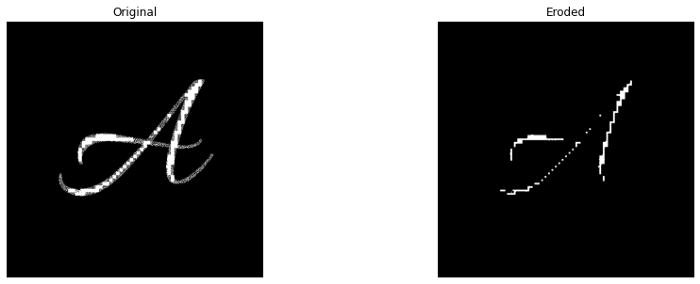

In [ ]:
kernel = np.ones((2,2),np.uint8)
imgEroded = cv2.erode(imgDilation,kernel,iterations=1)
cv2_imshow(imgEroded)

#Redimensionamento e recorte de imagens

Nesta seção serão apresentadas algumas funções básicas de redimensionamento e recorte de imagens.

##Redimensionamento

As imagens podem ser redimensionadas através da função "cv2.resize". No exemplo abaixo a imagem possui a resolução de 462x623 e 3 canais de cor.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/lambo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("(altura, largura, canais)")
print(img.shape)
cv2_imshow(img)


A função "cv2.resize" recebe a imagem e a resolução desejada e devolve a imagem redimensionada.

In [ ]:
imgResize = cv2.resize(img,(1000,500))
print("(altura, largura, canais)")
print(imgResize.shape)
cv2_imshow(imgResize)

##Recorte

As imagens podem ser recortadas de acordo com o exemplo abaixo.

In [ ]:
imgCropped = img[0:200,200:500]
print("Imagem Original")
cv2_imshow(img)
print("Imagem Recortada")
print(imgCropped.shape)
cv2_imshow(imgCropped)

#Formas e textos

Nesta seção serão apresentadas as funções básicas que permitem a inclusão de formas e textos em uma imagem.

##Formas

Imagem preta no padrão BGR com resolução 512x512 para ser utilizadas nos exemplos.

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2_imshow(img)

Vamos adicionar uma linha na imagem. A função "cv2.line()" recebe a imagem, dois pontos que dão origem a linha, a cor (no padrão BGR) e a espessura da mesma em pixels. 

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(150,255,0),15)
cv2_imshow(img)
print("Primeiro Ponto: (",0,", ",0,")")
print("Segundo Ponto: (",img.shape[1],", ",img.shape[0],")")

Um retângulo pode ser adicionado através da função "cv2.rectangle". A mesma recebe a imagem, dois pontos, cor (no padrão BGR) e espessura da linha.

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2.rectangle(img,(10,10),(256,256),(0,0,255),10)
cv2_imshow(img)

Uma circunferência pode ser adicionada através da função "cv2.circle". A mesma recebe a imagem, o ponto correspondente ao centro, o raio da circunferência, a cor (no padrão BGR) e espessura da linha.

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2.circle(img,(256,256),256,(255,255,0),5)
cv2_imshow(img)

##Texto

Textos podem ser adicionados na imagem através da função "cv2.putText()". A função recebe a imagem, o texto desejado, a posição do texto na imagem, a fonte desejada, o tamanho da fonte, a cor das letras (no padrão BGR) e a espessura das letras.

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2.putText(img," SENAI CIMATEC  ",(128,256),cv2.FONT_HERSHEY_COMPLEX,1,(168,94,29),1)
cv2_imshow(img)

As funções que adicionam as formas e textos podem combinadas para gerar composições de acordo com a necessidade da aplicação.

In [ ]:
img = np.zeros((512,512,3),np.uint8)
cv2.putText(img," SENAI CIMATEC  ",(128,248),cv2.FONT_HERSHEY_COMPLEX,1,(168,94,29),2)
cv2.circle(img,(256,256),180,(255,255,0),5)
cv2.line(img,(76,256),(436,256),(0,255,0),3)
cv2.rectangle(img,(74,74),(438,438),(0,0,255),2)
cv2_imshow(img)

#Distorção de Perspectiva

No contexto da fotografia, a perspectiva é resultado da posição da câmera em relação à cena, bem como das posições dos vários elementos da cena em relação uma à outra. O que chamamos de distorção de perspectiva é uma perspectiva que nos dá uma visão de uma cena ou objeto dentro daquela cena que é diferente do que normalmente esperamos que a cena ou o objeto pareça.

Imagine que você está a apenas 10 cm do rosto de alguém. A essa distância (ou seja, dessa perspectiva), você não pode ver o rosto inteiro de uma só vez - você precisa virar a cabeça para a esquerda, direita, para cima, para baixo, para ver o rosto inteiro. Agora pense no ângulo em que você está vendo o rosto deles quando virar a cabeça para a esquerda. O nariz sobressai, talvez bloqueando a visão da bochecha.

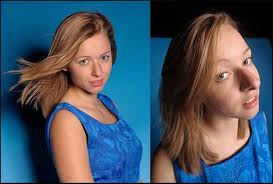

No exemplo a seguir vamos utilizar algumas ferramentas do openCV para realizar a transformação de perspectiva em uma carta de baralho.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/cards.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Características da imagem
print("(altura, largura, canais)")
print(img.shape)
cv2_imshow(img)

Neste exemplo temos as coordenadas dos 4 vértices da carta de baralho destacados em azul na imagem a seguir.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/cards.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apenas para vizualização #
# Marcação dos 4 vértices (AZUL)
cv2.circle(img,(111,219),2,(255,255,0),5) # Vértice 1
cv2.circle(img,(287,188),2,(255,255,0),5) # Vértice 2
cv2.circle(img,(154,482),2,(255,255,0),5) # Vértice 3
cv2.circle(img,(352,440),2,(255,255,0),5) # Vértice 4
# Apenas para vizualização #

cv2_imshow(img)

Neste exemplo queremos transformar a perspectiva da carta de baralho de tal forma que a mesma ocupe a região representada pelo retângulo destacado em vermelho na imagem abaixo. A carta após a conversão deve ter um tamanho final de 250x350 pixels.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/cards.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tamanho da carta
width,height = 250,350

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Retângulo representando a posição desejada (VERMELHO)
cv2.rectangle(img,(0,0),(width,height),(0,0,255),2)

cv2_imshow(img)


A imagem a seguir apresenta o caminho da transformação desejada.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/cards.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tamanho da carta
width,height = 250,350

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Apenas para vizualização #
# Marcação dos 4 vértices (AZUL)
cv2.circle(img,(111,219),2,(255,255,0),5) # Vértice 1
cv2.circle(img,(287,188),2,(255,255,0),5) # Vértice 2
cv2.circle(img,(154,482),2,(255,255,0),5) # Vértice 3
cv2.circle(img,(352,440),2,(255,255,0),5) # Vértice 4

# Marcação das 4 linhas (VERDE)
cv2.line(img,(0,0),(111,219),(0,255,0),3)
cv2.line(img,(width,0),(287,188),(0,255,0),3)
cv2.line(img,(0,height),(154,482),(0,255,0),3)
cv2.line(img,(width,height),(352,440),(0,255,0),3)

# Retângulo representando a posição desejada (VERMELHO)
cv2.rectangle(img,(0,0),(width,height),(0,0,255),3)
# Apenas para vizualização #

cv2_imshow(img)

A transformação de perspectiva é realizada através das funções:

*   cv2.getPerspectiveTransform(coordenadas_atuais, coordenadas_desejadas) - Gera a matriz de transformação de perspectiva
*   cv2.warpPerspective(imagem, matriz, (largura_img, altura_img)) - Faz a transformação de perspectiva



In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/cards.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tamanho da carta
width,height = 250,350

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput = cv2.warpPerspective(img,matrix,(width,height))

print("Imagem com distorção de perspectiva")
cv2_imshow(imgOutput)

print("Imagem Original")
cv2_imshow(img)

No próximo exemplo temos as coordenadas dos 4 vértices de uma placa veicular e seu tamanho aproximado.

In [ ]:
img2 = io.imread("https://quatrorodas.abril.com.br/wp-content/uploads/2018/03/val_0213-e1517962290393.jpg?quality=70&strip=info")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Tamanho da placa
width,height = 300,100

# Coordenadas atuais dos 4 vértices
pts1 = np.float32([[671,628], [1143,664], [669,805], [1133,846]])

# Coordenadas desejadas da projeção
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

# Matriz de Transformação de Perspectiva
matrix = cv2.getPerspectiveTransform(pts1,pts2)

# Distorção de Perspectiva
imgOutput2 = cv2.warpPerspective(img2,matrix,(width,height))

# Imprime a placa
cv2_imshow(imgOutput2)

# Imprime a imagem
cv2_imshow(img2)

# Reconhecimento Óptico de Caracteres

O Reconhecimento Óptico de Caracteres (OCR, do inglês Optical Character Recognition), é uma tecnologia para reconhecer caracteres a partir de um arquivo de imagem, que podem ser extraidas de uma grande variedade de fontes, como documentos escaneados, caracteres escritos à mão, datilografados ou impressos. Portanto, através do OCR é possível transformar caracteres presentes em uma imagem em um texto. O OCR depende diretamente da qualidade da imagem para ser capaz de extrair informações com precisão.

Neste exemplo será utilizado o Python-tesseract, que é um wrapper para o Tesseract-OCR do Google. Tesseract é um mecanismo de OCR com suporte para Unicode e capacidade de reconhecer mais de 100 idiomas. Ele pode ser treinado para reconhecer outros idiomas. O Tesseract é usado pela Google para detecção de texto em dispositivos móveis, em vídeo e na detecção de spam de imagem no Gmail.

In [ ]:
placa = imgOutput2.copy()

# Transforma em escala de cinza
gray = cv2.cvtColor(imgOutput2, cv2.COLOR_BGR2GRAY)
thresh = 255 - cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Aplica blur
thresh = cv2.GaussianBlur(thresh, (3,3), 0)

# Realiza a extração de texto
extractedInformation = pytesseract.image_to_string(thresh)
print(extractedInformation)

cv2_imshow(thresh)

In [ ]:
# Obtém altura e largura da imagem
h, w = thresh.shape

# Extrai os bounding boxes
boxes = pytesseract.image_to_boxes(thresh)
print(boxes)

# Desenha os bounding boxes na imagem
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(placa, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow(image)

# Detecção de Cores

O HSV, possui H (hue) que consiste na cor mesmo, o S (saturation) é a saturação de cor, muito relacionado a intensidade e o V (value) é o brilho da cor. Com as variações dessas características chegamos a diferentes níveis de cores e com intensidades e brilhos distintos.

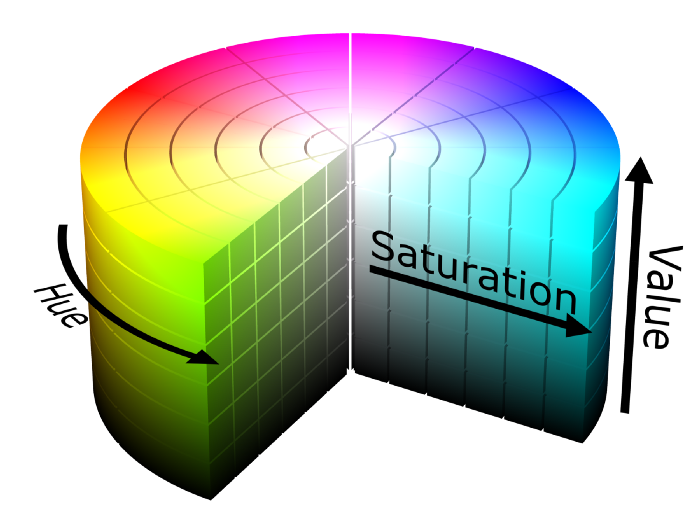

O primeiro passo é definir as cores que serão identificadas em HSV, neste caso vamos detectar a cor amarela.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/lambo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(img)
cv2_imshow(imgHSV)

Para isso, definimos dentro do espaço de cores HSV, um range mínimo e máximo da cor a ser identificada. Dessa forma, podemos rastrear diferentes níveis de intensidade da cor definida.

Agora percorremos os itens no dicionário de cores que chamamos de *upper*, a procura das cores que estejam no intervalo definido de menor intensidade *lower* até o de maior intensidade *upper*. Criamos uma máscara, com a função "cv2.inRange(img_HSV,lower,upper)", em torno dos objetos que possuam esse intervalo de cores.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/lambo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range mínimo e máximo da cor amarela (HSV)
h_min = 0
h_max = 50
s_min = 110
s_max = 240
v_min = 100
v_max = 255

lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

# Criação de máscara com base nos limites estabelecidos
mask = cv2.inRange(imgHSV,lower,upper)
cv2_imshow(mask)

Em posse da máscara, é possível realizar o recorte da região de interesse.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/lambo.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range mínimo e máximo da cor desejada (HSV)
h_min = 0
h_max = 50
s_min = 110
s_max = 240
v_min = 100
v_max = 255

lower = np.array([h_min,s_min,v_min])
upper = np.array([h_max,s_max,v_max])

# Criação de máscara com base nos limites estabelecidos
mask = cv2.inRange(imgHSV,lower,upper)

# Recorte da região delimitada pela máscara
imgResult = cv2.bitwise_and(img,img,mask=mask)

cv2_imshow(imgResult)

# Detecção de Formas

Para este exemplo, vamos utilizar uma imagem que contém formas como triângulo, quadrado, retângulo e círculo.

In [ ]:
img = io.imread("https://www.murtazahassan.com/wp-content/uploads/2020/08/shapes.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

A imagem é então convertida em tons de cinza através da função "cv2.cvtColor()".

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

A imagem é então binarizada de acordo com um dado intervalo. A binarização converte uma imagem em escala de cinza em uma imagem em preto e branco. Essa transformação é útil na detecção de contornos e reduz ainda mais a complexidade computacional. A tarefa principal é encontrar um limite (threshold) adequado.

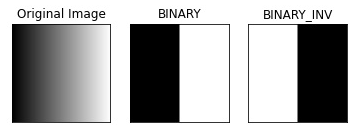



Os contornos são encontrados na imagem em escala de cinza através do método "TRESH_BINARY_INV" com a função "cv2.threshold()". 

In [ ]:
_, img_binary = cv2.threshold(img_gray, 220, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(img_binary)

As arestas dos contornos obtidos são então contadas usando a função "cv2.approxPolyDP ()" e as bordas de cada forma são então desenhadas na imagem usando a função "cv2.drawContours()".

O nome das formas geométricas é dado com base no número de arestas encontradas.

Exemplo: Se três arestas forem encontradas, teremos um triângulo.

No caso de um quadrado ou retângulo, a proporção entre a largura e a altura também é calculada. Se a proporção for próxima de 1, a forma será correspondente a um quadrado, caso contrário, será um retângulo.

Não correspondendo aos casos anteriores, é provável que seja um círculo.

In [ ]:
contours, _ = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
        # Conta a quantidade de arestas
        approx = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 5)
        x = approx.ravel()[0]
        y = approx.ravel()[1] - 5
        if len(approx) == 3:
            cv2.putText(img, "Triangulo", (x, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
        elif len(approx) == 4:
            x1, y1, w, h = cv2.boundingRect(approx)
            aspect_ratio = float(w) / float(h)
            if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
                cv2.putText(img, "Quadrado", (x, y),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            else:
                cv2.putText(img, "Retangulo", (x, y),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
        else:
            cv2.putText(img, "Circulo", (x, y),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

cv2_imshow(img)